In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.DataFrame({
    'Total_Runs': [34357, 28016, 27483, 25957,25534],
    'Span': [25, 16, 17, 18,19],
    'Name': ['Tendulkar','Sangakkara','Ponting','Jayawardene','Kallis']
})

In [2]:
df

,Total_Runs,Span,Name
0,34357,25,Tendulkar
1,28016,16,Sangakkara
2,27483,17,Ponting
3,25957,18,Jayawardene
4,25534,19,Kallis


In [14]:
df_scaled = df.copy()
columns = ['Total_Runs','Span']
num_features = df_scaled[columns]

In [15]:
num_features

,Total_Runs,Span
0,34357,25
1,28016,16
2,27483,17
3,25957,18
4,25534,19


## MinMax Scaler

### x_scaled = (x – x_min)/(x_max – x_min)

 #### It just scales all the data between 0 and 1.
 #### Though (0, 1) is the default range, we can define our range of max and min values as well.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
df_scaled[columns] = scaler.fit_transform(num_features.values)

In [18]:
df_scaled

,Total_Runs,Span,Name
0,1.000000,1.000000,Tendulkar
1,0.281310,0.000000,Sangakkara
2,0.220900,0.111111,Ponting
3,0.047943,0.222222,Jayawardene
4,0.000000,0.333333,Kallis


In [20]:
scaler10 = MinMaxScaler(feature_range=(1,10))

In [23]:
df_scaled[columns] = scaler10.fit_transform(num_features.values)

In [24]:
df_scaled

,Total_Runs,Span,Name
0,10.000000,10.0,Tendulkar
1,3.531792,1.0,Sangakkara
2,2.988099,2.0,Ponting
3,1.431486,3.0,Jayawardene
4,1.000000,4.0,Kallis


## Standard Scaler

### x_scaled = x – mean/std_dev

###  Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance). Standard Scaler assumes that the distribution of the variable is normal. If the distribution is not normal it wont work. 



In [29]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [31]:
df_scaled[columns] = standard_scaler.fit_transform(num_features) 

In [32]:
df_scaled

,Total_Runs,Span,Name
0,1.914167,1.897367,Tendulkar
1,-0.079678,-0.948683,Sangakkara
2,-0.247273,-0.632456,Ponting
3,-0.727104,-0.316228,Jayawardene
4,-0.860111,0.000000,Kallis


## MaxAbsScaler

### MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.  it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1]. 

In [3]:
df_scaled2 = df.copy()

In [4]:
df_scaled2

,Total_Runs,Span,Name
0,34357,25,Tendulkar
1,28016,16,Sangakkara
2,27483,17,Ponting
3,25957,18,Jayawardene
4,25534,19,Kallis


In [5]:
df_scaled2['Football_Rating'] = [100.0, -263.0, 2000.0, -5.0,200]

In [6]:
df_scaled2

,Total_Runs,Span,Name,Football_Rating
0,34357,25,Tendulkar,100.0
1,28016,16,Sangakkara,-263.0
2,27483,17,Ponting,2000.0
3,25957,18,Jayawardene,-5.0
4,25534,19,Kallis,200.0


In [7]:
from sklearn.preprocessing import MaxAbsScaler
scaler_MaxAbsScaler = MaxAbsScaler()

In [8]:
columns1 = ['Total_Runs','Span','Football_Rating']
num_features1 = df_scaled2[columns1]

In [9]:
df_scaled2[columns1] = scaler_MaxAbsScaler.fit_transform(num_features1)

In [11]:
df_scaled2

,Total_Runs,Span,Name,Football_Rating
0,1.000000,1.00,Tendulkar,0.0500
1,0.815438,0.64,Sangakkara,-0.1315
2,0.799924,0.68,Ponting,1.0000
3,0.755508,0.72,Jayawardene,-0.0025
4,0.743196,0.76,Kallis,0.1000


## Robust Scaler

#### The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-
#### 1. removes the median from the data
#### 2. scales the data by the InterQuartile Range(IQR)

x_scaled = (x – Q1)/(Q3 – Q1)

In [14]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [18]:
df_scaled_RS = df.copy()
columns_RS = ['Total_Runs','Span']
scaled_features_rs=df_scaled_RS[columns_RS]
df_scaled_RS[columns_RS] = robust_scaler.fit_transform(scaled_features_rs)

In [19]:
df_scaled_RS[columns_RS]

,Total_Runs,Span
0,3.338514,3.5
1,0.258864,-1.0
2,0.000000,-0.5
3,-0.741136,0.0
4,-0.946576,0.5


## Quantile Transformer Scaler

###  Quantile Transformer Scaler converts the variable distribution to a normal distribution. and scales it accordingly. it also deals with the outliers.

### 1. It computes the cumulative distribution function of the variable
### 2. It uses this cdf to map the values to a normal distribution
### 3. Maps the obtained values to the desired output distribution using the associated ### quantile function
### Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler. Thus, it is best to use this for non-linear data


In [20]:
from sklearn.preprocessing import QuantileTransformer
scaler_q = QuantileTransformer()

In [27]:
df_scaled_q = df.copy()
col_q = ['Total_Runs','Span']
num_features_q = df_scaled_q[col_q]

In [28]:
df_scaled_q[col_q]= scaler_q.fit_transform(num_features_q.values)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [29]:
df_scaled_q[col_q]

,Total_Runs,Span
0,1.00,1.00
1,0.75,0.00
2,0.50,0.25
3,0.25,0.50
4,0.00,0.75


## Log Transform

###  It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.
### Log Transform -
### Reduces the impact of too-low values
### Reduces the impact of too-high values.

#### If our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly 

In [30]:
df_scaled_LT = df.copy()
col_LT = ['Total_Runs','Span']
num_features_LT = df_scaled_q[col_q]

In [34]:
df_scaled_LT

,Total_Runs,Span,Name
0,34357,25,Tendulkar
1,28016,16,Sangakkara
2,27483,17,Ponting
3,25957,18,Jayawardene
4,25534,19,Kallis


<AxesSubplot:ylabel='Frequency'>

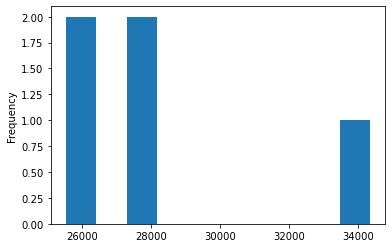

In [37]:
df_scaled_LT['Total_Runs'].plot.hist()

In [38]:
df_scaled_LT['log_Total_Runs'] = np.log(df_scaled_LT['Total_Runs'])

<AxesSubplot:ylabel='Frequency'>

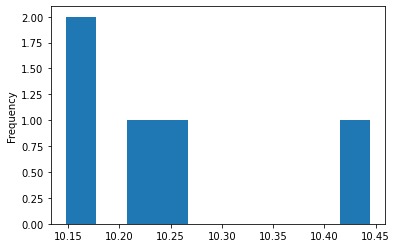

In [39]:
df_scaled_LT['log_Total_Runs'].plot.hist()

In [40]:
df_scaled_LT

,Total_Runs,Span,Name,log_Total_Runs
0,34357,25,Tendulkar,10.444561
1,28016,16,Sangakkara,10.240531
2,27483,17,Ponting,10.221323
3,25957,18,Jayawardene,10.164197
4,25534,19,Kallis,10.147766


## Power Transformer Scaler

The Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal)
However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the:
1. Box-Cox transform
2. The Yeo-Johnson transform

Box-Cox works with only positive values, while 
Yeo-Johnson works with both positive and negative values.

In [51]:
df_scaled_PT = df.copy()
col_PT = ['Total_Runs','Span']
num_features_PT = df_scaled_PT[col_PT]

In [52]:
from sklearn.preprocessing import PowerTransformer
scaler_pt = PowerTransformer(method ='box-cox')
df_scaled_PT[col_PT]= scaler_pt.fit_transform(num_features_PT.values)

In [55]:
df_scaled_PT

,Total_Runs,Span,Name
0,0.0,1.597887,Tendulkar
1,0.0,-1.383434,Sangakkara
2,0.0,-0.602313,Ponting
3,0.0,-0.023867,Jayawardene
4,0.0,0.411727,Kallis


## Unit Vector Scaler/Normalizer

Normalization is the process of scaling individual samples to have unit norm.
the Normalizer works on the rows. Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data.

However, there is a difference in the way it does so.

    1. If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
    2. If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1

In [56]:
df_scaled_Norm = df.copy()
col_Norm = ['Total_Runs','Span']
num_features_Norm = df_scaled_Norm[col_Norm]

In [58]:
from sklearn.preprocessing import Normalizer
scaler_norm = Normalizer(norm = 'l1')
df_scaled_Norm[col_Norm] = scaler_norm.fit_transform(num_features_Norm.values)

In [59]:
df_scaled_Norm

,Total_Runs,Span,Name
0,0.999273,0.000727,Tendulkar
1,0.999429,0.000571,Sangakkara
2,0.999382,0.000618,Ponting
3,0.999307,0.000693,Jayawardene
4,0.999256,0.000744,Kallis


## Custom Transformer

In [66]:
from sklearn.preprocessing import FunctionTransformer
transformer_CT = FunctionTransformer(np.sqrt, validate = True)

In [67]:
df_scaled_CT = df.copy()
col_CT = ['Total_Runs','Span']
num_features_CT = df_scaled_CT[col_CT]

In [68]:
df_scaled_CT[col_CT] = transformer_CT.transform(num_features_CT.values)
df_scaled_CT

,Total_Runs,Span,Name
0,185.356413,5.000000,Tendulkar
1,167.379808,4.000000,Sangakkara
2,165.779975,4.123106,Ponting
3,161.111762,4.242641,Jayawardene
4,159.793617,4.358899,Kallis
